In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [ ]:
def draw_ccs(x, y, z, o):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')

  ax.quiver(o[0], o[1], o[2], x[0], x[1], x[2], length=10, normalize=True, color='r')
  ax.quiver(o[0], o[1], o[2], y[0], y[1], y[2], length=10, normalize=True, color='g')
  ax.quiver(o[0], o[1], o[2], z[0], z[1], z[2], length=10, normalize=True, color='b')

  ax.set_xlim3d(0, 10)
  ax.set_ylim3d(0, 10)
  ax.set_zlim3d(0, 10)

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  plt.show()
  return ax

In [ ]:
# CS1
x = np.array([1, 0, 0])
y = np.array([0, 1, 0])
z = np.array([0, 0, 1])
o = np.array([0, 0, 0])
x, y, z, o

(array([1, 0, 0]), array([0, 1, 0]), array([0, 0, 1]), array([0, 0, 0]))

In [ ]:
# A 3D point in CS1
pt1 = np.array([10, 6, 8])

# Can be interpreted as follows
pt1_interp = pt1[0] * x + pt1[1] * y + pt1[2] * z

np.array_equal(pt1, pt1_interp)

True

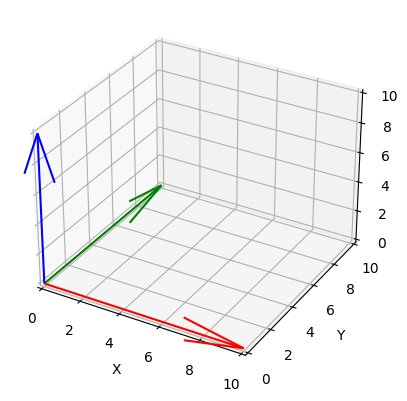

In [ ]:
# viz of CS1
ax = draw_ccs(x, y, z, o)
ax.scatter(pt1[0], pt1[1], pt1[2], marker='o')
plt.show()

# Rotation only

In [ ]:
# CS2
u = np.array([0, -1, 0])
v = np.array([0, 0, -1])
w = np.array([1, 0, 0])
c = np.array([0, 0, 0])

In [ ]:
# The same 3D point in CS2
pt2 = np.array([-6, -8, 10])

pt2_interp = pt2[0] * u + pt2[1] * v + pt2[2] * w

np.array_equal(pt1, pt2_interp)

True

In [ ]:
# Goal: Compute a rotation (R_12) to convert a point from CS2 to CS1, i.e. pt1 = R_12 * pt2
# Equivalent: find a rotation R_12 to convert coordinates of CS1 to those of CS2.
# Conclusion: Coordinate transformation is the inverse of point transformation.

# columns of R: u, v, w.
R = np.stack((u, v, w), axis=-1)

# Convert x, y, z of CS1 to u, v, w of CS2
np.array_equal(u, np.matmul(R, x)), np.array_equal(v, np.matmul(R, y)), np.array_equal(w, np.matmul(R, z))

(True, True, True)

In [ ]:
# Use the same rotation to convert pt2 from CS2 to pt1 from CS1.
np.array_equal(pt1, np.matmul(R, pt2))

True

# Rotation + Translation

In [ ]:
# CS2
u = np.array([0, -1, 0])
v = np.array([0, 0, -1])
w = np.array([1, 0, 0])
c = np.array([2, 5, 3])

In [ ]:
# The same 3D point in CS3
pt3 = np.array([-1, -5, 8])

pt3_interp = pt3[0] * u + pt3[1] * v + pt3[2] * w + c

np.array_equal(pt1, pt3_interp)

True

In [ ]:
# Compute the transformation (R_13 | t_13) to convert a point from CS3 to CS1, i.e. pt1 = R_13 * pt3 + t_13
# Equivalent: find a transformation (R_13 | t_13) to convert coordinates of CS1 to those of CS3.
# Conclusion: Coordinate transformation is the inverse of point transformation.
#       |       |
# pt1 = | u v w | * pt3 + c
#       |       |
# where u, v, w are the coordinates of CS3 w.r.t. CS1, and c is the origin of CS3 w.r.t CS1.

# columns of R: u, v, w.
R = np.stack((u, v, w), axis=-1)
t = c

# Convert x, y, z, o of CS1 to u, v, w, c of CS3
np.array_equal(c+u, np.matmul(R, x)+t), np.array_equal(c+v, np.matmul(R, y)+t), np.array_equal(c+w, np.matmul(R, z)+t), np.array_equal(c, np.matmul(R, o)+t)

(True, True, True, True)

In [ ]:
np.array_equal(pt1, np.matmul(R, pt3) + t)

True

# Conclusion

We can view this from the perspecitve of changing bases of the vector space.

Let's say we have a global coordinate system ($\mathbf{x}$, $\mathbf{y}$, $\mathbf{z}$), and a camera coordinate system ($\mathbf{u}$, $\mathbf{v}$, $\mathbf{w}$). WLOG, we assume that the global coordinate system have the canonical forms, namely, $\mathbf{x} = (1, 0, 0)^\top$, $\mathbf{y} = (0, 1, 0)^\top$, and $\mathbf{z} = (0, 0, 1)^\top$.

We can transform the unit base vector to itself as follows:

<!-- \begin{equation*}
\mathbf{x} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} \mathbf{x} + \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}
\end{equation*} -->

\begin{aligned}
\begin{pmatrix} \mid & \mid & \mid \\ \mathbf{x} & \mathbf{y} & \mathbf{z} \\ \mid & \mid & \mid \end{pmatrix}_{w\rightarrow w} \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}_w + \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} &= \mathbf{x} \\
&= \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}_w
\end{aligned}

where $\begin{pmatrix} \mid & \mid & \mid \\ \mathbf{x} & \mathbf{y} & \mathbf{z} \\ \mid & \mid & \mid \end{pmatrix}_{w\rightarrow w}$ is the rotation matrix from global CS to global CS, with basis vectors of global CS as columns. $\begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$ is translation vector and origin of the global CS.

If we were to transform from camera CS to global CS, we need to express the bases w.r.t. the global CS.

\begin{aligned}
\begin{pmatrix} \mid & \mid & \mid \\ \mathbf{u} & \mathbf{v} & \mathbf{w} \\ \mid & \mid & \mid \end{pmatrix}_{c\rightarrow w} \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}_c + \mathbf{c} &= \mathbf{u} + \mathbf{c}
\end{aligned}

where $\mathbf{u}$, $\mathbf{v}$, $\mathbf{w}$ are the basis vectors of the camera CS w.r.t. the global CS. $\mathbf{c}$ is the origin/center of camera CS w.r.t. global CS.

Thus the transformation from camera to global CS is
\begin{aligned}
\begin{pmatrix} \mid & \mid & \mid & \mid \\ \mathbf{u} & \mathbf{v} & \mathbf{w} & \mathbf{c} \\ \mid & \mid & \mid & \mid \end{pmatrix}_{c\rightarrow w} =
\begin{pmatrix} \mathbf{R} & \mathbf{c} \\ \mathbf{0} & 1\end{pmatrix}
\end{aligned}

The transformation from global to camera CS is
\begin{aligned}
\begin{pmatrix} \mathbf{R}^\top & -\mathbf{R}^\top \mathbf{c} \\
\mathbf{0} & 1 \end{pmatrix}
\end{aligned}
